<a href="https://colab.research.google.com/github/juyeon-shin/CLUB-D.N.A./blob/main/%EC%9D%BC%EB%B0%98%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%AA%A8%EB%8D%B8%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 기본 설정

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def nmae(true, pred):
  score = np.mean((np.abs(true-pred))/true)
  return score

## 1. 데이터 셋 전처리

In [ ]:
train_mer = pd.read_csv('/content/drive/MyDrive/202110 데이콘_가스공급량 수요예측 모델개발/데이터/train_mer.csv')

train_mer['연월일'] = pd.to_datetime(train_mer['연월일'], format='%Y-%m-%d', errors='raise')
train_mer.index = train_mer['연월일']
train_mer = train_mer.drop(['연월일'],axis=1)
train_mer = train_mer.drop(['최저기온(℃)','최고기온(℃)'], axis=1)
train_mer.dtypes
train_mer

,시간,구분,year,month,day,weekday,수입금액지수,가스소비량,평균기온(℃),환율,공급량
연월일,,,,,,,,,,,
2013-01-01,1,0,2013,1,1,1,193.49,6487,-3.2,1071.3,2497.129
2013-01-01,2,0,2013,1,1,1,193.49,6487,-3.2,1071.3,2363.265
2013-01-01,3,0,2013,1,1,1,193.49,6487,-3.2,1071.3,2258.505
2013-01-01,4,0,2013,1,1,1,193.49,6487,-3.2,1071.3,2243.969
2013-01-01,5,0,2013,1,1,1,193.49,6487,-3.2,1071.3,2344.105
...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31,20,6,2017,12,31,6,114.29,6569,2.1,1076.0,517.264
2017-12-31,21,6,2017,12,31,6,114.29,6569,2.1,1076.0,530.896
2017-12-31,22,6,2017,12,31,6,114.29,6569,2.1,1076.0,506.287


In [ ]:
val_mer = pd.read_csv('/content/drive/MyDrive/202110 데이콘_가스공급량 수요예측 모델개발/데이터/val_mer.csv')

val_mer['연월일'] = pd.to_datetime(val_mer['연월일'], format='%Y-%m-%d', errors='raise')
val_mer.index = val_mer['연월일']
val_mer = val_mer.drop(['연월일'],axis=1)
val_mer = val_mer.drop(['최저기온(℃)','최고기온(℃)'], axis=1)
val_mer.dtypes
val_mer

,시간,구분,year,month,day,weekday,수입금액지수,가스소비량,평균기온(℃),환율,공급량
연월일,,,,,,,,,,,
2018-01-01,1,0,2018,1,1,0,119.47,7013,-0.4,1076.0,1765.008
2018-01-01,2,0,2018,1,1,0,119.47,7013,-0.4,1076.0,1679.186
2018-01-01,3,0,2018,1,1,0,119.47,7013,-0.4,1076.0,1610.885
2018-01-01,4,0,2018,1,1,0,119.47,7013,-0.4,1076.0,1604.123
2018-01-01,5,0,2018,1,1,0,119.47,7013,-0.4,1076.0,1711.506
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31,20,6,2018,12,31,0,172.60,6381,-3.2,1120.0,681.033
2018-12-31,21,6,2018,12,31,0,172.60,6381,-3.2,1120.0,669.961
2018-12-31,22,6,2018,12,31,0,172.60,6381,-3.2,1120.0,657.941


In [ ]:
test = pd.read_csv('/content/drive/MyDrive/깍두기와 겉절이들/가스공급량 수요 예측/데이터/same_test.csv')
test['일자'] = pd.to_datetime(test['일자'], format='%Y-%m-%d', errors='raise')
test.index= test['일자']
test = test.drop(['Unnamed: 0','일자','연월일'],axis=1)#, , '시간', '구분', '연월일', 'year', 'month', 'day','weekday', 'pred_y', 'pred_x.1', 'pred_y.1'], axis=1)
d_map = {}
for i, d in enumerate(test['구분'].unique()):
    d_map[d] = i
test['구분'] = test['구분'].map(d_map)

test

,시간,구분,year,month,day,weekday,소비량,평균기온,수입금액지수,달러환율
일자,,,,,,,,,,
2019-01-01,1,0,2019,1,1,1,7094.169809,-3.531051,185.074997,1120
2019-01-01,2,0,2019,1,1,1,7094.169809,-3.531051,185.074997,1120
2019-01-01,3,0,2019,1,1,1,7094.169809,-3.531051,185.074997,1120
2019-01-01,4,0,2019,1,1,1,7094.169809,-3.531051,185.074997,1120
2019-01-01,5,0,2019,1,1,1,7094.169809,-3.531051,185.074997,1120
...,...,...,...,...,...,...,...,...,...,...
2019-03-31,20,6,2019,3,31,6,5482.130419,14.000000,192.097301,1120
2019-03-31,21,6,2019,3,31,6,5482.130419,14.000000,192.097301,1120
2019-03-31,22,6,2019,3,31,6,5482.130419,14.000000,192.097301,1120


## 2. RNN 모델링

+ 요일의 라벨 인코딩이 되어있는 상태
+ 구분의 라벨 인코딩이 되어있는 상태


+ 트레인 데이터 정규화
+ 트레인 데이터 x,y 분할
+ 분할한 데이터 reshape

In [ ]:
train_values = train_mer.values[:,-1]

X_train = []
for i in range(len(train_values)-24):
  X_train.append(train_values[i:i+24])

X_data = np.array(X_train)
X_data

array([[2497.129, 2363.265, 2258.505, ..., 2711.441, 2586.297, 2494.457],
       [2363.265, 2258.505, 2243.969, ..., 2586.297, 2494.457, 2169.093],
       [2258.505, 2243.969, 2344.105, ..., 2494.457, 2169.093, 2051.733],
       ...,
       [3183.359, 3081.029, 2927.616, ...,  520.804,  517.264,  530.896],
       [3081.029, 2927.616,  409.619, ...,  517.264,  530.896,  506.287],
       [2927.616,  409.619,  356.824, ...,  530.896,  506.287,  470.638]])

In [ ]:
val_values = val_mer.values[:,-1]

X_val = []
for i in range(len(val_values)-24):
  X_val.append(val_values[i:i+24])

X_val = np.array(X_val)
X_val

array([[1765.008, 1679.186, 1610.885, ..., 2206.341, 2117.721, 1993.822],
       [1679.186, 1610.885, 1604.123, ..., 2117.721, 1993.822, 1661.221],
       [1610.885, 1604.123, 1711.506, ..., 1993.822, 1661.221, 1578.653],
       ...,
       [4354.915, 4204.484, 3982.757, ...,  678.975,  681.033,  669.961],
       [4204.484, 3982.757,  530.446, ...,  681.033,  669.961,  657.941],
       [3982.757,  530.446,  467.16 , ...,  669.961,  657.941,  610.953]])

In [ ]:
#train data 정규화
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(X_data)

In [ ]:
#x_train과 x_test를 독립적으로 스케일링 하지 마세요

In [ ]:
# train data x,y 분할
X_data = scaled[:,:-1]
y_data = scaled[:, -1]

X_train = X_data[:300000]
y_train = y_data[:300000]
X_valid = X_data[300000:]
y_valid = y_data[300000:]

In [ ]:
#train data, x_test data reshape
X_train = X_train.reshape(X_train.shape[0],1,X_train.shape[1])
X_valid = X_valid.reshape(X_valid.shape[0],1, X_valid.shape[1])

In [ ]:
print('X_train.shape : ', X_train.shape)
print('y_train.shape : ', y_train.shape)
print('X_valid.shape : ', X_valid.shape)
print('y_valid.shape : ', y_valid.shape)

X_train.shape :  (300000, 1, 23)
y_train.shape :  (300000,)
X_valid.shape :  (6744, 1, 23)
y_valid.shape :  (6744,)


In [ ]:
#다변량 RNN

import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=(X_train.shape[1], X_train.shape[2]))
])

model.compile(loss="mse", optimizer='SGD')
history = model.fit(X_train, y_train, epochs=20,validation_data=(X_valid, y_valid))

model.summary()

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


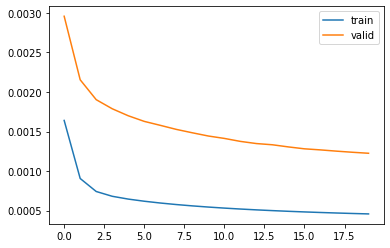

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.legend()
plt.show()

In [ ]:
model.evaluate(X_valid, y_valid)

211/211 [==============================] - 0s 1ms/step - loss: 0.0012


0.0012251534499228

In [ ]:
y_pred = model.predict(X_valid)

## RNN 모델링 : 단순 RNN

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.SimpleRNN(24, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    keras.layers.SimpleRNN(24),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20,validation_data=(X_valid, y_valid))

model.summary()

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_valid)
y_pred

In [ ]:
model.evaluate(X_valid, y_valid)

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print('예측성능 비교지표 RMSE: %.3f' % rmse)

In [ ]:
plt.plot(y_pred)

## RNN 모델링 : 층 더 쌓아봄

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.SimpleRNN(24, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    keras.layers.SimpleRNN(24, return_sequences=True),
    keras.layers.SimpleRNN(24),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer="SGD")
history = model.fit(X_train, y_train, epochs=20,validation_data=(X_valid, y_valid))

model.summary()

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_valid)
y_pred

In [ ]:
model.evaluate(X_valid, y_valid)

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print('예측성능 비교지표 RMSE: %.3f' % rmse)

## 다변량 RNN

In [ ]:
train_values = train_mer.values[:,:]
train_values 

array([[ 1.000000e+00,  0.000000e+00,  2.013000e+03, ..., -3.200000e+00,
         1.071300e+03,  2.497129e+03],
       [ 2.000000e+00,  0.000000e+00,  2.013000e+03, ..., -3.200000e+00,
         1.071300e+03,  2.363265e+03],
       [ 3.000000e+00,  0.000000e+00,  2.013000e+03, ..., -3.200000e+00,
         1.071300e+03,  2.258505e+03],
       ...,
       [ 2.200000e+01,  6.000000e+00,  2.017000e+03, ...,  2.100000e+00,
         1.076000e+03,  5.062870e+02],
       [ 2.300000e+01,  6.000000e+00,  2.017000e+03, ...,  2.100000e+00,
         1.076000e+03,  4.706380e+02],
       [ 2.400000e+01,  6.000000e+00,  2.017000e+03, ...,  2.100000e+00,
         1.076000e+03,  4.446180e+02]])

In [ ]:
#train = pd.concat([train_mer,val_mer],axis=0)
#train.shape
#train.reshape(train.shape[0],1,train,shape[1])

In [ ]:
#train data 정규화
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(train_values)

In [ ]:
# train data x,y 분할
X_data = scaled[:,:-1]
y_data = scaled[:, -1]

X_train = X_data[:300000]
y_train = y_data[:300000]
X_valid = X_data[300000:]
y_valid = y_data[300000:]

In [ ]:
#train data, x_test data reshape
X_train = X_train.reshape(X_train.shape[0],1,X_train.shape[1])
X_valid = X_valid.reshape(X_valid.shape[0],1, X_valid.shape[1])

In [ ]:
print('X_train.shape : ', X_train.shape)
print('y_train.shape : ', y_train.shape)
print('X_valid.shape : ', X_valid.shape)
print('y_valid.shape : ', y_valid.shape)

X_train.shape :  (300000, 1, 10)
y_train.shape :  (300000,)
X_valid.shape :  (6768, 1, 10)
y_valid.shape :  (6768,)


In [ ]:
#다변량 RNN

import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=(X_train.shape[1], X_train.shape[2]))
])

model.compile(loss="mse", optimizer='SGD')
history = model.fit(X_train, y_train, epochs=20,validation_data=(X_valid, y_valid))

model.summary()

Epoch 1/20
9375/9375 [==============================] - 14s 1ms/step - loss: 0.0071 - val_loss: 0.0111
Epoch 2/20
9375/9375 [==============================] - 13s 1ms/step - loss: 0.0039 - val_loss: 0.0110
Epoch 3/20
9375/9375 [==============================] - 13s 1ms/step - loss: 0.0039 - val_loss: 0.0111
Epoch 4/20
9375/9375 [==============================] - 13s 1ms/step - loss: 0.0039 - val_loss: 0.0111
Epoch 5/20
9375/9375 [==============================] - 13s 1ms/step - loss: 0.0039 - val_loss: 0.0111
Epoch 6/20
9375/9375 [==============================] - 13s 1ms/step - loss: 0.0039 - val_loss: 0.0111
Epoch 7/20
9375/9375 [==============================] - 13s 1ms/step - loss: 0.0039 - val_loss: 0.0111
Epoch 8/20
9375/9375 [==============================] - 13s 1ms/step - loss: 0.0039 - val_loss: 0.0111
Epoch 9/20
9375/9375 [==============================] - 13s 1ms/step - loss: 0.0039 - val_loss: 0.0111
Epoch 10/20
9375/9375 [==============================] - 13s 1ms/step - l

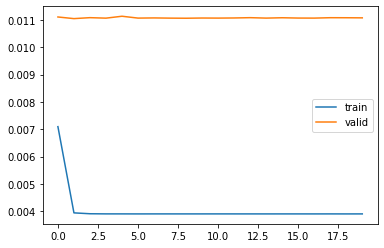

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.legend()
plt.show()

In [ ]:
model.evaluate(X_valid, y_valid)

212/212 [==============================] - 0s 1ms/step - loss: 0.0111


0.011070776730775833

In [ ]:
y_pred = model.predict(X_valid)

In [ ]:
x_train = X_train.reshape(X_train.shape[0],X_train.shape[2])
x_valid = X_valid.reshape(X_valid.shape[0],X_valid.shape[2])
print(x_train.shape, y_train.shape)

(300000, 10) (300000,)


In [ ]:
original_train = np.concatenate([x_train,y_train.reshape(-1,1)],axis=1)
print(original_train.shape)
original_valid = np.concatenate([x_valid, y_valid.reshape(-1,1)],axis=1)
print(original_valid.shape)

original = np.concatenate([original_train,original_valid],axis=0)
print(original.shape)

y_ori = scaler.inverse_transform(original)[:,-1]
y_ori
#y_ori_train = y_ori[:300000]
#y_ori_valid = y_ori[300000:]

(300000, 11)
(6768, 11)
(306768, 11)


array([2497.129, 2363.265, 2258.505, ...,  506.287,  470.638,  444.618])

In [ ]:
predict_valid = np.concatenate([x_valid, y_pred.reshape(-1,1)],axis=1)
print(predict_valid.shape)

predict_y = np.concatenate([original_train, predict_valid],axis=0)
print(predict_y.shape)

y_pre = scaler.inverse_transform(predict_y)[:,-1]
y_pre

(6768, 11)
(306768, 11)


array([2497.129     , 2363.265     , 2258.505     , ..., 1952.95108382,
       1966.22736734, 1979.49846872])

In [ ]:
print(y_ori[-20:])
print(y_pre[-20:])

[375.626 367.902 393.266 463.577 535.922 555.973 526.637 461.172 429.132
 417.549 404.711 396.05  419.335 475.64  520.804 517.264 530.896 506.287
 470.638 444.618]
[1726.47642559 1739.83735064 1753.19378451 1766.5457272  1779.89248775
 1793.23475711 1806.57218982 1819.90444039 1833.23185431 1846.55391335
 1859.87182668 1873.18386693 1886.49141599 1899.79378292 1913.09079498
 1926.38279764 1939.66944543 1952.95108382 1966.22736734 1979.49846872]


In [ ]:
nmae(y_ori[-20:], y_pre[-20:])

3.0784102085572576

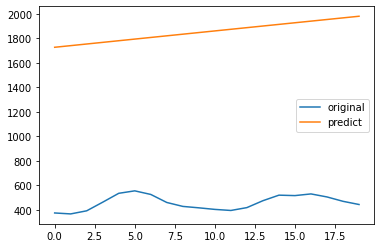

In [ ]:
plt.plot(y_ori[-20:], label='original')
plt.plot(y_pre[-20:], label='predict')
plt.legend()

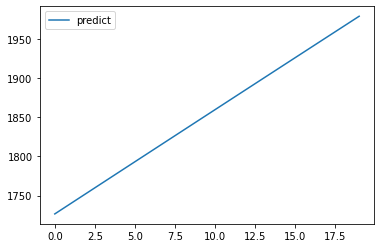

In [ ]:
plt.plot(y_pre[-20:], label='predict')
plt.legend()

In [ ]:
test_values = test.values
#scaler = MinMaxScaler(feature_range=(0, 1))
#test_values_sc = scaler.fit_transform(test_values)
#test_values = test_values_sc.reshape(test_values_sc.shape[0],1,test_values_sc.shape[1])
print(test_values.shape)

(15120, 10)


In [ ]:

t_reshape= test_values.reshape(test_values.shape[0],1,test_values.shape[1])
t_reshape[:test_values.shape[0]].shape

(321888, 1, 11)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(test_values)

In [ ]:
train = scaled[:test_values.shape[0]]
test = scaled[test_values.shape[0]:]

train.shape

(321888, 11)

In [ ]:
test.shape

(0, 11)

In [ ]:
test_values.shape[0]

321888

In [ ]:




y_pred_test = model.predict(t_reshape)
print(y_pred_test.shape)
y_pred_test

(15120, 1)


array([[-1.],
       [-1.],
       [-1.],
       ...,
       [-1.],
       [-1.],
       [-1.]], dtype=float32)

In [ ]:
yhat = model.predict(test_values)
yhat

In [ ]:
# make a prediction

yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

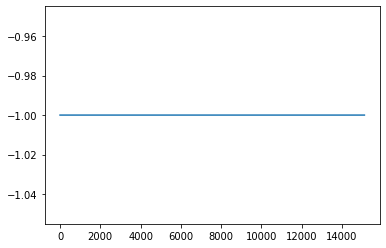

In [ ]:
plt.plot(y_pred_test)

(15120, 10)

In [ ]:
test_values.reshape(test_values.shape[0],test_values.shape[2])

array([[0.        , 0.        , 0.        , ..., 0.26832353, 0.        ,
        0.        ],
       [0.04347826, 0.        , 0.        , ..., 0.26832353, 0.        ,
        0.        ],
       [0.08695652, 0.        , 0.        , ..., 0.26832353, 0.        ,
        0.        ],
       ...,
       [0.91304348, 1.        , 0.        , ..., 0.95312533, 0.25828825,
        0.        ],
       [0.95652174, 1.        , 0.        , ..., 0.95312533, 0.25828825,
        0.        ],
       [1.        , 1.        , 0.        , ..., 0.95312533, 0.25828825,
        0.        ]])

## 다변량 LSTM

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, GRU, LSTM

model = Sequential()
model.add(LSTM(10, input_shape=(X_train.shape[0], X_train.shape[2])))
model.add(Dense(1))

model.compile(loss="mse", optimizer="SGD")
history = model.fit(X_train, y_train, epochs=20)#,validation_data=(X_valid, y_valid))

model.summary()

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_valid)
y_pred

In [ ]:
model.evaluate(X_valid, y_valid)

(15120, 1, 10)

(15120, 1, 10)

In [ ]:
y_pred = model.predict(test_values)

## 기타 

In [ ]:
import pandas as pd
import numpy as np


def nmae(true_df, pred_df):
    target_idx = true_df.iloc[:,0]
    pred_df = pred_df[pred_df.iloc[:,0].isin(target_idx)]
    pred_df = pred_df.sort_values(by=[pred_df.columns[0]], ascending=[True])
    true_df = true_df.sort_values(by=[true_df.columns[0]], ascending=[True])
    
    true = true_df.iloc[:,1].to_numpy()
    pred = pred_df.iloc[:,1].to_numpy()
    
    score = np.mean((np.abs(true-pred))/true)
    
    return score